In [8]:
import pystan,os
import numpy as np
from matplotlib import pyplot as plt
os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


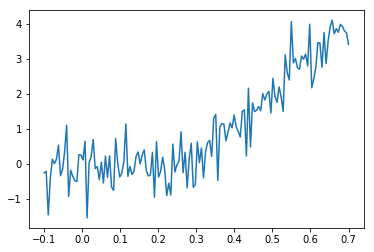

In [115]:
time =np.linspace(-0.1,0.7,150)
tau = 0.3
slope = 10
offset = 0


w = 1. / (1. + np.exp(-(150*(time-tau))))

#     w = 1-inv_logit(150*(time - tau));  


def predict(offset,slope,time,tau):
    act =  offset +  w *  (slope * (time-tau))+np.random.normal(0,0.5,len(time))
    return(act)
#ict = offset +  w .* (slope * (time-tau)); // tau is the new offset

plt.plot(time,act)
datafit = {'etdata':act,
'time': time,
'tauprior':0.5,
'ntime':len(time)}

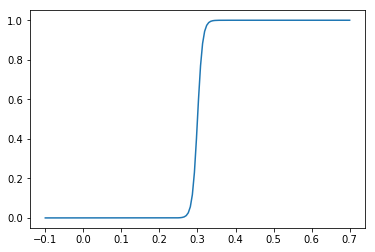

In [103]:
plt.plot(datafit['time'],w)

In [109]:
sm = pystan.StanModel(file="changepoint.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6486d650609bcb152e7f587ea56546f3 NOW.


In [116]:
datafit['invlogitfactor'] = 150

In [117]:
fit = sm.sampling(data=datafit, iter=1000, chains=1)
fit

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Inference for Stan model: anon_model_6486d650609bcb152e7f587ea56546f3.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma           0.5  1.5e-3   0.03   0.45   0.48    0.5   0.52   0.56    376    1.0
slope          9.78    0.03   0.46   8.93   9.46   9.78   10.1  10.71    219    1.0
offset        -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -0.05   0.04    274    1.0
tau            0.28  9.2e-4   0.01   0.25   0.27   0.28   0.29   0.31    223    1.0
predict[0]    -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -0.05   0.04    274    1.0
predict[1]    -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -0.05   0.04    274    1.0
predict[2]    -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -0.05   0.04    274    1.0
predict[3]    -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -0.05   0.04    274    1.0
predict[4]    -0.09  3.7e-3   0.06  -0.21  -0.13  -0.09  -

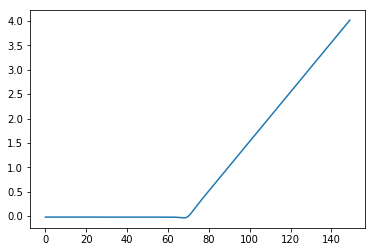

In [118]:
plt.plot(fit.extract()['predict'][0,:])

In [3]:
import pystan
sm3= pystan.StanModel(file="changepoint3.stan")

ValueError: Failed to parse Stan model 'anon_model_5698bad1e5ae2b409fbff15f966879da'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

binary infix operator <= with functional interpretation logical_lt requires arguments or primitive type (int or real), found left type=vector, right arg type=real; 
No matches for: 

  logical_lt(vector, real)

Available argument signatures for logical_lt:

  logical_lt(int, int)
  logical_lt(int, real)
  logical_lt(real, int)
  logical_lt(real, real)

ERROR:  Container index must be integer; found type=ill formed
  error in 'unknown file name' at line 39, column 12
  -------------------------------------------------
    37:      
    38:   
    39:     etdata[time<(tau+searchtime)] ~ normal(predict[time<(tau+searchtime)],sigma);
                   ^
    40:    }
  -------------------------------------------------

PARSER EXPECTED: <one or more container indexes followed by ']'>
